In [2]:
import pandas as pd 
data=pd.read_csv("data.csv")
data.head()

,鍚屽,鍚屽績,鍚屽織,鍚屾剰,鍚屾瘮,鍚岃垷,鍚岃,鍚岃,鍚岃璺?鍚岄€?鍚岄,鍚嶅北,...,Unnamed: 4539,Unnamed: 4540,Unnamed: 4541,Unnamed: 4542,Unnamed: 4543,Unnamed: 4544,Unnamed: 4545,Unnamed: 4546,Unnamed: 4547,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x.shape

(500, 4548)

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [15]:
clf = DecisionTreeClassifier(random_state=25)

clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

score_
score = cross_val_score(clf,x,y,cv=10).mean()

score



0.658

0.67


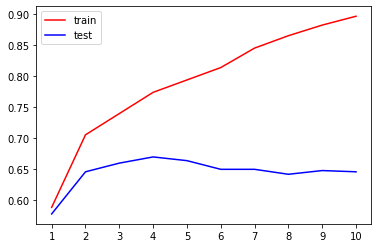

In [18]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [19]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

GS.best_score_

0.7142857142857142

In [20]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 11,
 'splitter': 'random'}